<h2><b>Importing Requirements</b></h2>

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import joblib
from xgboost import XGBClassifier
import joblib


In [2]:
df = pd.read_csv('alzheimers_disease_data.csv')

In [3]:
df.head(5).T

,0,1,2,3,4
PatientID,4751,4752,4753,4754,4755
Age,73,89,73,74,89
Gender,0,0,0,1,0
Ethnicity,0,0,3,0,0
EducationLevel,2,0,1,1,0
BMI,22.927749,26.827681,17.795882,33.800817,20.716974
Smoking,0,0,0,1,0
AlcoholConsumption,13.297218,4.542524,19.555085,12.209266,18.454356
PhysicalActivity,6.327112,7.619885,7.844988,8.428001,6.310461
DietQuality,1.347214,0.518767,1.826335,7.435604,0.795498


In [4]:
print("\n Handling Missing Values of our Dataframe")
print(df.isnull().sum())


 Handling Missing Values of our Dataframe
PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges         

In [5]:
duplicates = df[df.duplicated()]

print(f"Repeated coloumn value: {duplicates.shape[0]}")

Repeated coloumn value: 0


In [6]:
df.drop([
    'PatientID', 'DoctorInCharge', 'HeadInjury', 'FamilyHistoryAlzheimers', 'Confusion', 'Disorientation',
    'Hypertension', 'DifficultyCompletingTasks', 'PersonalityChanges',
    'SleepQuality', 'Diabetes', 'Forgetfulness'
], axis=1, inplace=True)


In [7]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()

Unique values in column 'Age':
[73 89 74 86 68 75 72 87 78 84 64 69 63 65 82 77 71 83 79 67 66 70 85 60
 88 62 81 61 80 90 76]

Unique values in column 'Gender':
[0 1]

Unique values in column 'Ethnicity':
[0 3 1 2]

Unique values in column 'EducationLevel':
[2 0 1 3]

Unique values in column 'BMI':
[22.92774923 26.82768119 17.79588244 ... 15.47647896 15.29991122
 33.28973831]

Unique values in column 'Smoking':
[0 1]

Unique values in column 'AlcoholConsumption':
[13.29721773  4.54252382 19.55508453 ...  4.59467018  8.67450518
  7.89070315]

Unique values in column 'PhysicalActivity':
[6.32711247 7.61988454 7.84498779 ... 9.88600229 6.35428175 6.57099338]

Unique values in column 'DietQuality':
[1.34721431 0.51876714 1.82633466 ... 8.12002455 1.26342749 7.94140388]

Unique values in column 'CardiovascularDisease':
[0 1]

Unique values in column 'Depression':
[1 0]

Unique values in column 'SystolicBP':
[142 115  99 118  94 168 143 117 130 131 165 145 137 124 148 154 132 144
 120 178 1

In [8]:
numerical_columns = [col for col in df.columns if df[col].nunique() > 10]
categorical_columns = df.columns.difference(numerical_columns).difference(['Diagnosis']).to_list()



In [ ]:
from sklearn.preprocessing import MinMaxScaler


columns = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']

min_max_scaler = MinMaxScaler()
df[columns] = min_max_scaler.fit_transform(df[columns])

standard_scaler = StandardScaler()
df[columns] = standard_scaler.fit_transform(df[columns])

In [ ]:
X = df.drop(columns = ['Diagnosis'])
y = df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True)

In [11]:
model = XGBClassifier(learning_rate=0.01, max_depth=5, n_estimators=200, random_state=42)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.9534883720930233
Confusion Matrix:
 [[270   7]
 [ 13 140]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       277
           1       0.95      0.92      0.93       153

    accuracy                           0.95       430
   macro avg       0.95      0.94      0.95       430
weighted avg       0.95      0.95      0.95       430



C:\Users\BERKAY\AppData\Local\Temp\ipykernel_24524\2544351524.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x="Importance", y="Feature", palette="viridis")
C:\Users\BERKAY\AppData\Local\Temp\ipykernel_24524\2544351524.py:19: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\BERKAY\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


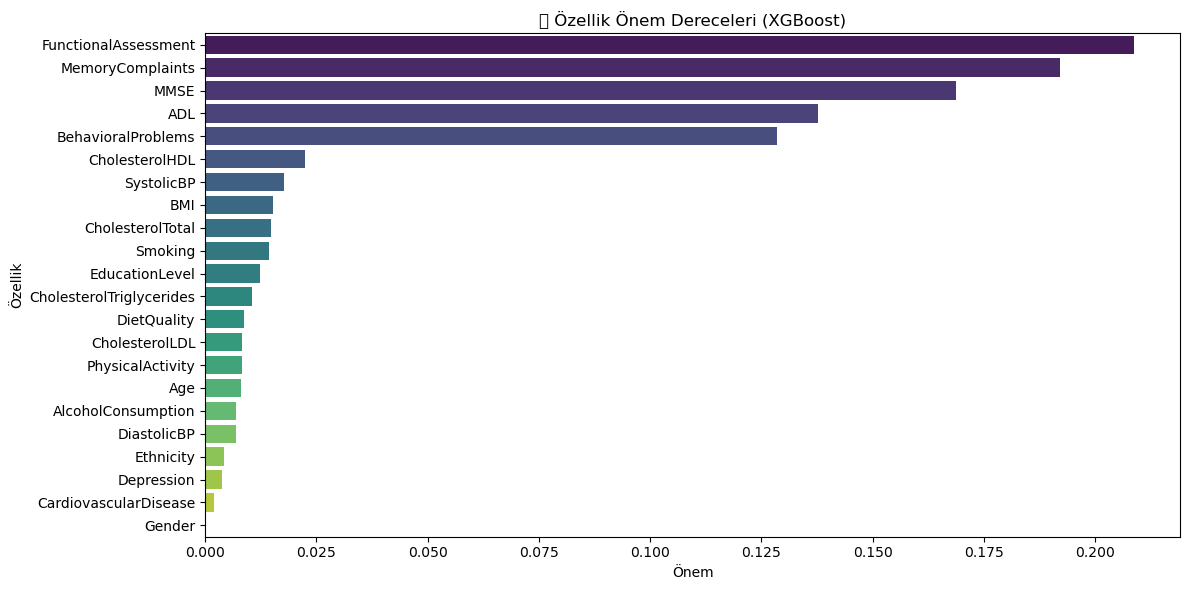

In [ ]:
from matplotlib import pyplot as plt


importances = model.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(data=importance_df, x="Importance", y="Feature", palette="viridis")
plt.title("Feature Importance Ranking (XGBoost)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [14]:
feature_names = list(X_test.columns) 

In [22]:
joblib.dump(feature_names, "alzheimers_feature_names.pkl")
joblib.dump(model, "alzheimers_model.pkl")
joblib.dump({
    "minmax": min_max_scaler,
    "standard": standard_scaler,
    "columns": columns 
}, 'scalers.joblib')



['scalers.joblib']